### **Data Visualization for The Loans Data**

In this analysis we will explore the data of bank loans and understand the risk of the borrowers. Plus we will answer some of the key questions about the borrowers and their ability to pay.

## **Univariate Visualization**

**Exploring the Annual Percentage Rate**

Basically the annual percentage rate is the bottom annual rate that the borrower pays for the lender each year. This rate doesn't account for compounding interest. 

However, as we see in the graph that the annual percentage rate for most of our sample is centered around 18%. This might be due to credit card debts which are extremely high. Therefore, we see a high APR.

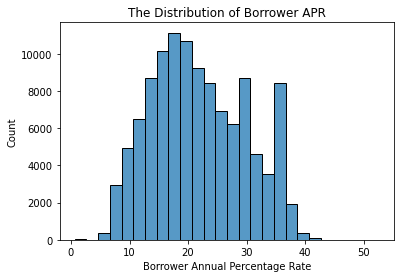

In [ ]:
# Histogram for Borrower APR
bins = ['0%', '10%', '20%', '30%', '40%', '50%']
b_APR = df_vis['BorrowerAPR'] * 100 
sb.histplot(df_vis, x=b_APR, binwidth=2);
plt.xlabel("Borrower Annual Percentage Rate");
plt.title("The Distribution of Borrower APR");

**Exploring The Loan Status**

It's very important for us to see how many of the custemers are done wirh the payments. Around 38 thousand are done and 54 thousand are still making their payments on time.

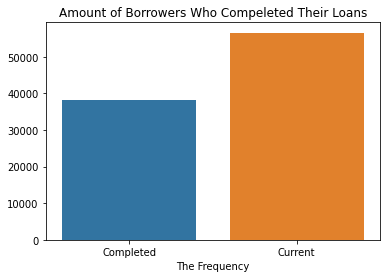

In [ ]:
# Bar Chart for Borrower State

# Get the counts for each category
comp = len(df_vis[df_vis['LoanStatus'] == 'Completed'])
curr = len(df_vis[df_vis['LoanStatus'] == 'Current'])

y = [comp, curr]
x = ['Completed', 'Current']

# Bar Chart
sb.barplot( x=x, y=y);
plt.xlabel("The Status of Loans");
plt.xlabel("The Frequency");
plt.title("Amount of Borrowers Who Compeleted Their Loans");

**Exploring Employment Status**

Here we will figure out how many of our sample are still employed and how many are not. This could give us more indication about the probability of our customers defualting here. As we see here, employed is the biggest status, which means credit risk analysis were done accurately to choose the right borrowers.

In [ ]:
df_vis['EmploymentStatus'].value_counts().index

Index(['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
       'Part-time', 'Not employed', 'Retired'],
      dtype='object')

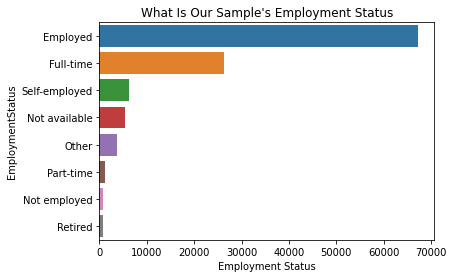

In [ ]:
# Employment Status Bar Chart Side
sb.countplot(data=df_vis, order=df_vis['EmploymentStatus'].value_counts().index, y='EmploymentStatus');
plt.xlabel("Amount of People");
plt.xlabel("Employment Status");
plt.title("What Is Our Sample's Employment Status");

**Exploring Monthly Payments and Borrower Investors**

Here we will see how the borrowers are willing to pay their monthly payments to the investors. We notice high volume of few investors for each borrorwer. Thus insuring effective risk sharing among our investors/depositors. As well as we see our borrowers have very small payments, which is reducing the risk of default of most cases.

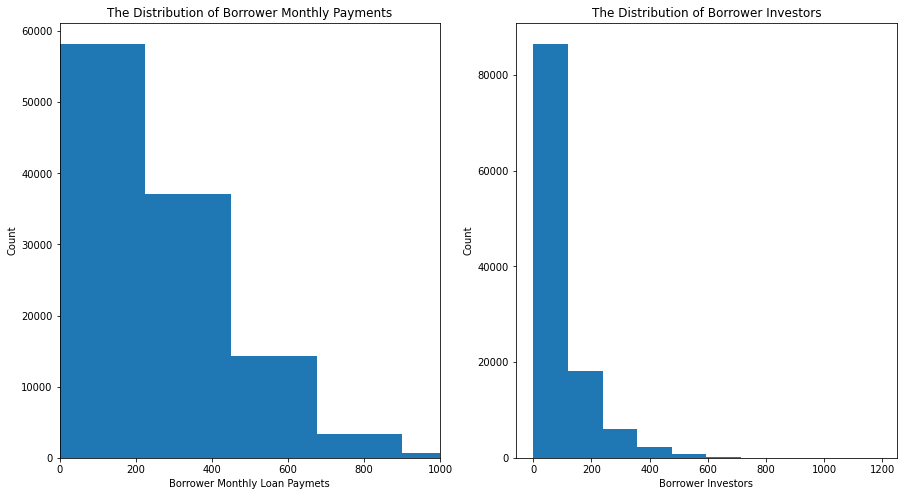

In [ ]:
# Monthly payment and monthly income historgrams
# subplots for each then combined chart

plt.figure(figsize = [15, 8])

# Subplot 1
plt.subplot(1,2,1)
plt.hist(df_vis['MonthlyLoanPayment']);
plt.xlim(0,1000)
plt.ylabel("Count")
plt.xlabel("Borrower Monthly Loan Paymets");
plt.title("The Distribution of Borrower Monthly Payments");

# Subplot 2
plt.subplot(1,2,2)

plt.hist(df_vis['Investors']);
plt.ylabel("Count")
plt.xlabel("Borrower Investors");
plt.title("The Distribution of Borrower Investors");


## **Bivariate Visualization**

**Exploring Borrower Rate**

This will give us an indication on how expensive the borrowing rate for our bank from the central bank. Therefore, we wil measure it against the Borrower APR for the customers. There's a positive correlation between both borrower APR to retail or business borrowers and borrower rate (bank borrowing from central bank at overnight interbank lending rate). This correlation is normal to ensure profit for the bank. 

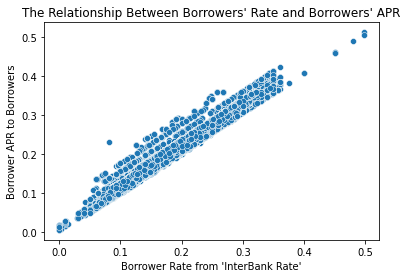

In [ ]:
# Borrower Rate vs BorrowerAPR scatter plot
sb.scatterplot(data=df_vis, x='BorrowerRate', y='BorrowerAPR');
plt.xlabel("Borrower Rate from 'InterBank Rate'");
plt.ylabel("Borrower APR to Borrowers")
plt.title("The Relationship Between Borrowers' Rate and Borrowers' APR");


**Exploring The Terms vs Loan Original Amount**

#### 'My favorite chart'

How many years are the outstanding from the borrowers. The longer the terms, the higher the compound profits in the long run. As we can see that loan original amount is high too. So, we will have increase profits after 50% of each borrower's term. Becuase the borrower pays higher portion of the principal and small portion of the interest first. THen the opposite happens later

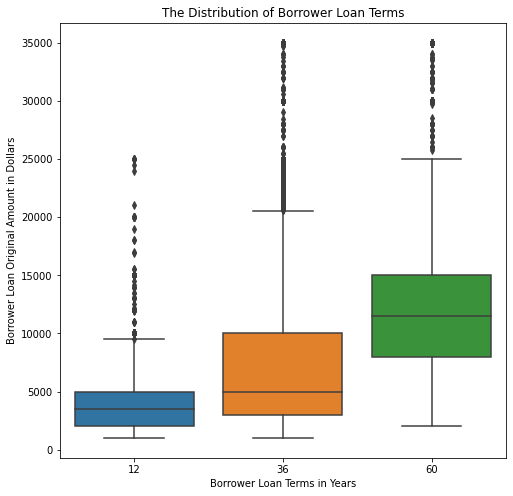

In [ ]:
# Box plots
plt.figure(figsize=(8,8))
sb.boxplot(data = df_vis, x = 'Term', y = 'LoanOriginalAmount')
plt.ylabel("Borrower Loan Original Amount in Dollars");
plt.xlabel("Borrower Loan Terms in Years");
plt.title("The Distribution of Borrower Loan Terms");

**Exploring Monthly Income vs Borrower State**

From here we will see the state with higher incomes and holding highest borrowing from the bank. Most of the states have income in the two ranges (25K -49K) and (50K-74K)

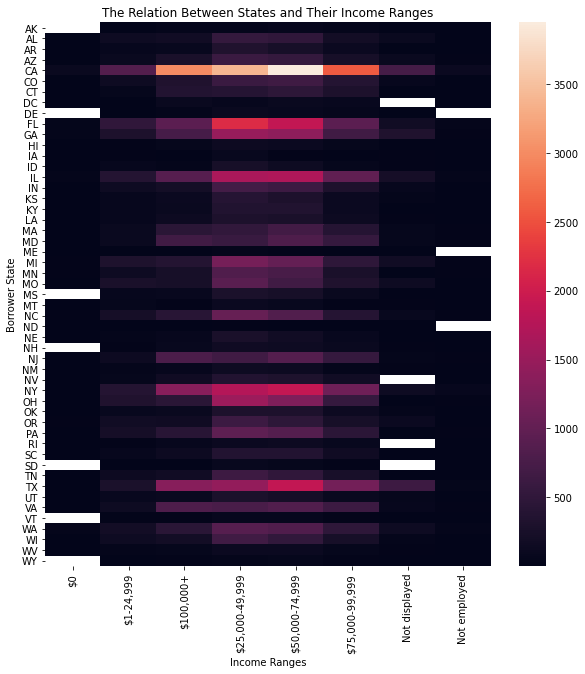

In [44]:
# Heat map StatedMonthlyIncome vs BorrowerState
plt.figure(figsize=(10,10))
ct_counts = df.groupby(['IncomeRange', 'BorrowerState']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'BorrowerState', columns = 'IncomeRange', values = 'count')

# data_hm = df_vis.pivot('BorrowerState', 'StatedMonthlyIncome')
sb.heatmap(ct_counts);
plt.xlabel("Income Ranges");
plt.ylabel("Borrower State");
plt.title("The Relation Between States and Their Income Ranges");

## **Multivariate Visualization**

**Does Borrower APR Differ Based on The Credit Score?**

We don't see a clear correlation between the credit score and the APR. Perhaps that depends on the different types of loans. However, we notice that the available bank card credit are low with low credit scores but high with higher credit scores as they approach the $50,000 mark. 

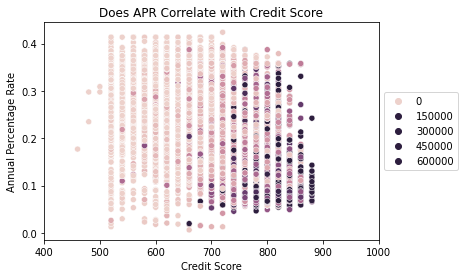

In [ ]:
# Second Question
# Scatterplot of Borrower APR and Credit Score and the amount in credit
sb.scatterplot(data=df_vis, x='CreditScoreRangeLower', y='BorrowerAPR', hue='AvailableBankcardCredit', hue_norm=(0,50000));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(400, 1000);
plt.xlabel("Credit Score");
plt.ylabel("Annual Percentage Rate");
plt.title("Does APR Correlate with Credit Score");